In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import plotly.express as px

In [12]:
data = pd.read_csv("/content/drive/MyDrive/Colabnot/insurance.csv")
df = data.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
data.shape

(1338, 7)

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [16]:
df.isna().sum() #boş değer yok

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
df.describe(include = "object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


#Keşifsel veri analizi#

In [19]:
data.bmi.value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

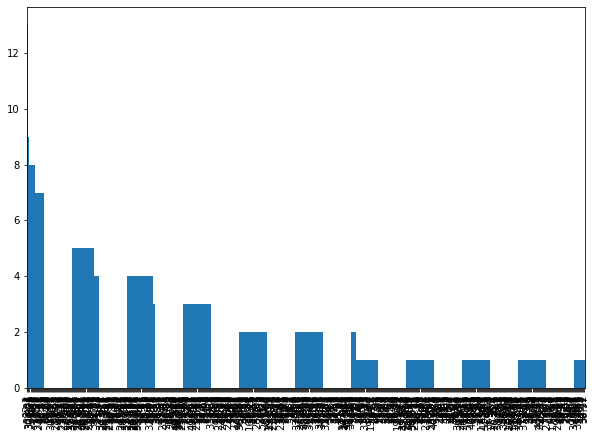

In [18]:
#Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz
plt.figure(figsize=(10,7))
df['bmi'].value_counts().plot.bar()

In [24]:
#"bmi” değişkeninde outlier var mıdır? İnceleyiniz.
data.bmi.mean()


30.66339686098655

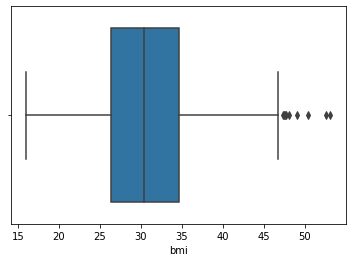

In [25]:
sns.boxplot(x = "bmi", data=data);

In [20]:
# “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [21]:
data.charges.value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [22]:
data[data["smoker"] == "yes"]["charges"].mean()

32050.23183153284

In [23]:
data[data["smoker"] == "no"]["charges"].mean()

8434.268297856204

sigara içenlerin sağlık masraf ortalaması çok daha fazla

In [26]:
#“bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

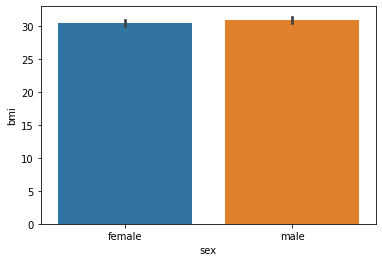

In [27]:
sns.barplot(data=data, x="sex", y="bmi");

In [28]:
data[data["sex"] == "female"]["bmi"].mean()

30.37774924471299

In [29]:
data[data["sex"] == "male"]["bmi"].mean()

30.943128698224854

erkek ve kadınların vücut kitle indeksi ortalama değerlerin yakın olduğunu gördük

#Veri Ön İşleme Yapılması#

In [40]:
def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name] = label_encoder.fit_transform(df[column_name])

In [41]:
label_encoding('smoker')
label_encoding('sex')

In [42]:
#one-hot encoding
one_hot = pd.get_dummies(df['region'])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [43]:
df = pd.concat([df, one_hot],axis = 1)
df.drop('region',axis = 1, inplace = True)
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [44]:
X = df.drop('charges',axis=1)
y = df['charges']

In [45]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state = 42)

#Model Selection#

In [61]:
#özet şeklinde model(iki farklı şekilde yapılabilir)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR())]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 6072.7101 (LR) 
RMSE: 5923.0152 (KNN) 
RMSE: 6585.1311 (CART) 
RMSE: 4833.3482 (RF) 
RMSE: 12692.8508 (SVR) 


In [47]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [48]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred = linear_model.predict(X_test)

In [50]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [51]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

In [52]:
#SVM
from sklearn.svm import SVR, LinearSVR

In [53]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
y_train_pred = svr_model.predict(X_train)

 Hiper-parametre Optimizasyonu


In [66]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 
from xgboost import XGBRegressor


xgb = XGBRegressor()

parameters = {
              'eta': [.03, .07, 0.1], #(eta or shrinkage)
              "min_child_weight": [.1, .5, 1],
              "max_depth" : [4, 5, 6, 7]}


xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 5,
                        n_jobs = -1
                        )

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

[20:52:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8342490400344156
{'eta': 0.03, 'max_depth': 4, 'min_child_weight': 0.1}


(Mean Squared Error, Mean Absolute Error vs.) modelin değerlendirilmesi
